# Evaluating Entropies in tfSF (Simulation 1)

In this notebook we examine entropies in the original data and in learned representations, repurposing some of the experiments in [1].

## Setup

We start by importing some libraries:

In [1]:
import numpy as np
import joblib
import sklearn.datasets as ds
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import linregress

import tfSF
import npSF

import data.data_creation as D
import IT

We define the parameters of our simulation:

In [2]:
learned_features = 2
n_epochs = 200

IT_bins=30

We define a couple of helper functions: a simple linear regression function and a helper function to compute the tfSF learned representation as a function of the weights. Notice that here, for simplicity, we call the steps of SF implemented using *numpy*; since no learning is now required, using *numpy* saves us the overhead of instantiating a *tensorflow* model.

In [3]:
def linreg(x,y):
    a, b, _, _, _ = stats.linregress(x,y)
    return a*x+b
    

def computeZ(X,W):
    WX = np.dot(W,X.T)
    F = npSF.softabsolute(WX)
    Fsquish, _ = npSF.l2row(F)
    Fhat, _ = npSF.l2row(Fsquish.T)
    Z = Fhat
    return Z

## Simulation 1 from [1]

We use *Simulation 1* in [1], and we run a tfSF module with a varying number of training points.

In [16]:
n_simulations = 1

original_features = 2
learned_features = 2
n_samples = [2,3,4,5,6,7,8,9,10,12,15,20,25,30,50,100]
n_epochs = 200
    
maxX = 5; minX = -5   

dataH = np.zeros((len(n_samples),n_simulations))
results = np.zeros((len(n_samples),n_simulations,n_epochs))
for i,n_samp in enumerate(n_samples):
    
    print('Samples {0}'.format(n_samp))
    for j in tqdm(range(n_simulations)):
        data = D.get_samples_independent_gaussians_2D(n_samples_train=n_samp, n_samples_test=2, mu1 = 0.0, sigma1 = .5, mu2 = 0.0, sigma2 =.5)
        
        X = data['X_tr']
        dataH[i,j] = IT.compute_H_bin(X,bins=IT_bins)
        
        tfsf = tfSF.SFilter(n_features=learned_features)
        tfsf.fit(X,epochs=n_epochs,verbose=0,batchsize=n_samp)
        
        Ws = tfsf.weights
        for e in range(n_epochs):
            Z = computeZ(X,Ws[e])
            results[i,j,e] = IT.compute_H_bin(Z,bins=IT_bins)

  0%|          | 0/1 [00:00<?, ?it/s]

Samples 2


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 3


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 4


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 5


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 6


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 7


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 8


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 9


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 10


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 12


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 15


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 20


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 25


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 30


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 50


  0%|          | 0/1 [00:00<?, ?it/s]

Samples 100


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


We then plot te entropy of the original data, the learned representations and the theoretical maximum.

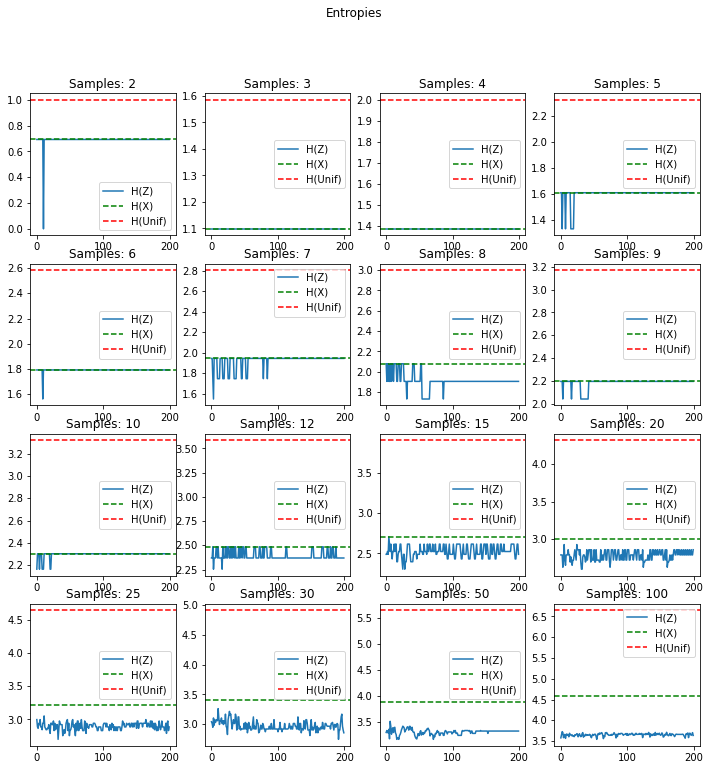

In [49]:
fig,ax = plt.subplots(4,4, figsize=(12,12))
fig.suptitle('Entropies')

for i in range(len(n_samples)):
    h_unif = -np.log2(1./n_samples[i])
    ax[i//4,i%4].plot(results[i,0,:],label='H(Z)')
    ax[i//4,i%4].axhline(dataH[i,0],color='green',linestyle='--',label='H(X)')
    ax[i//4,i%4].axhline(h_unif ,color='red',linestyle='--',label='H(Unif)')
    ax[i//4,i%4].set_title('Samples: {0}'.format(n_samples[i]))
    ax[i//4,i%4].legend()
    
    
    #ax[i//4,i%4].plot(linreg(np.arange(len(results[i,:,0][results[i,:,0] != 0])),results[i,:,0][results[i,:,0] != 0]),'r--')

In [22]:
data = D.get_samples_independent_gaussians_2D(n_samples_train=n_samp, n_samples_test=2, mu1 = 0.0, sigma1 = .5, mu2 = 0.0, sigma2 =.5)
        
X = data['X_tr']
dataH[i,j] = IT.compute_H_bin(X,bins=IT_bins)
        
tfsf = tfSF.SFilter(n_features=learned_features)
tfsf.fit(X,epochs=n_epochs,verbose=0,batchsize=n_samp)
        
Ws = tfsf.weights
#for e in range(n_epochs):
#    Z = computeZ(X,Ws[e])
#    results[i,j,e] = IT.compute_H_bin(Z,bins=IT_bins)

binsize = 1. / IT_bins
digitized = np.floor(X / binsize).astype('int')
px, unique_inverse = IT.get_unique_probs(digitized)


In [38]:
np.min(digitized)

-40

In [40]:
px

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [41]:
np.where(px==0.02)

(array([58, 78]),)

In [42]:
unique_inverse[58]

16

In [43]:
np.sum(digitized==16)

5

In [27]:
np.floor(X / binsize)

array([33, 22, 20, 34, 23, 30, 17, 10, 37, 48,  7,  1, 77, 18, 88, 36, 72,
        4, 24, 91, 41, 29, 44, 96, 38, 95, 47, 56, 49, 65, 39, 58, 15, 63,
       74,  8, 78, 78, 13, 87,  0, 92, 57, 61, 59, 11, 85, 58,  5, 46, 89,
        9, 67, 12, 55, 81, 14, 28, 16, 80, 21, 83, 94, 82, 50, 25, 51, 53,
       93, 31, 69, 73, 71, 84, 70, 60, 32, 64, 75, 42, 19,  3, 27, 97, 79,
       52, 66, 43, 62, 35, 26, 76, 86, 68, 90, 45,  2, 54,  6, 40])

### References

[1] Zennaro, F.M. and Chen, K., 2019. Towards Further Understanding of Sparse Filtering via Information Bottleneck. arXiv preprint arXiv:1910.08964.